# DATA SCIENCE REGRESSION PROJECT : PREDICTING HOUSE PRICES IN BANGALORE 

## LIBRARY IMPORT 

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
import json

from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [4]:
warnings.filterwarnings('ignore')

## DATA IMPORT 

In [6]:
df = pd.read_csv('DATA/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

*Drop features that are not required to build our model*

In [10]:
df2 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [12]:
len(df.location.unique())

1306

## DATA CLEANING

In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## FEATURE ENGINEERING 

In [18]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [25]:
def sqft_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
sqft_num('2333')

2333.0

In [27]:
sqft_num('2333-2335')

2334.0

In [28]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(sqft_num)
#df4.head()
df4.loc[137]

location      8th Phase JP Nagar
size                       2 BHK
total_sqft                1073.5
bath                         2.0
price                     54.005
bhk                            2
Name: 137, dtype: object

In [29]:
df4 = df4[df4.total_sqft.notnull()]
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

**Add new feature called price_per_sqft**

In [31]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [33]:
df5.location = df5.location.apply(lambda x: x.strip())
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## DIMENSION REDUCTION

**Any location having less than 10 counts will get named as 'others' to reduce the dimension**

In [36]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [37]:
len(df5.location.unique())

1287

In [38]:
len(location_stats[location_stats<=10])

1047

In [39]:
less_than_10 = location_stats[location_stats<=10]
less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [40]:
df5.location = df5.location.apply(lambda x: 'others' if x in less_than_10 else x)
len(df5.location.unique())

241

## OUTLIER REMOVAL

In [42]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


**Removing by the logic that the house having more than 2 BHK with lesser sqft (i.e) if total_sqft/bhk < 300 it will considered as an outlier**

In [44]:
df5[df5.total_sqft/df5.bhk < 300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,others,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [45]:
df5.shape

(13200, 7)

In [46]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [47]:
df6.shape

(12456, 7)

In [48]:
def pps_outlier(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby('location'):
        #print(subdf)
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        #print(m,"|",s)
        reduced_df = subdf[(subdf.price_per_sqft > (m-s))& (subdf.price_per_sqft <= (m+s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [49]:
df7 = pps_outlier(df6)
df7.shape

(10242, 7)

In [50]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


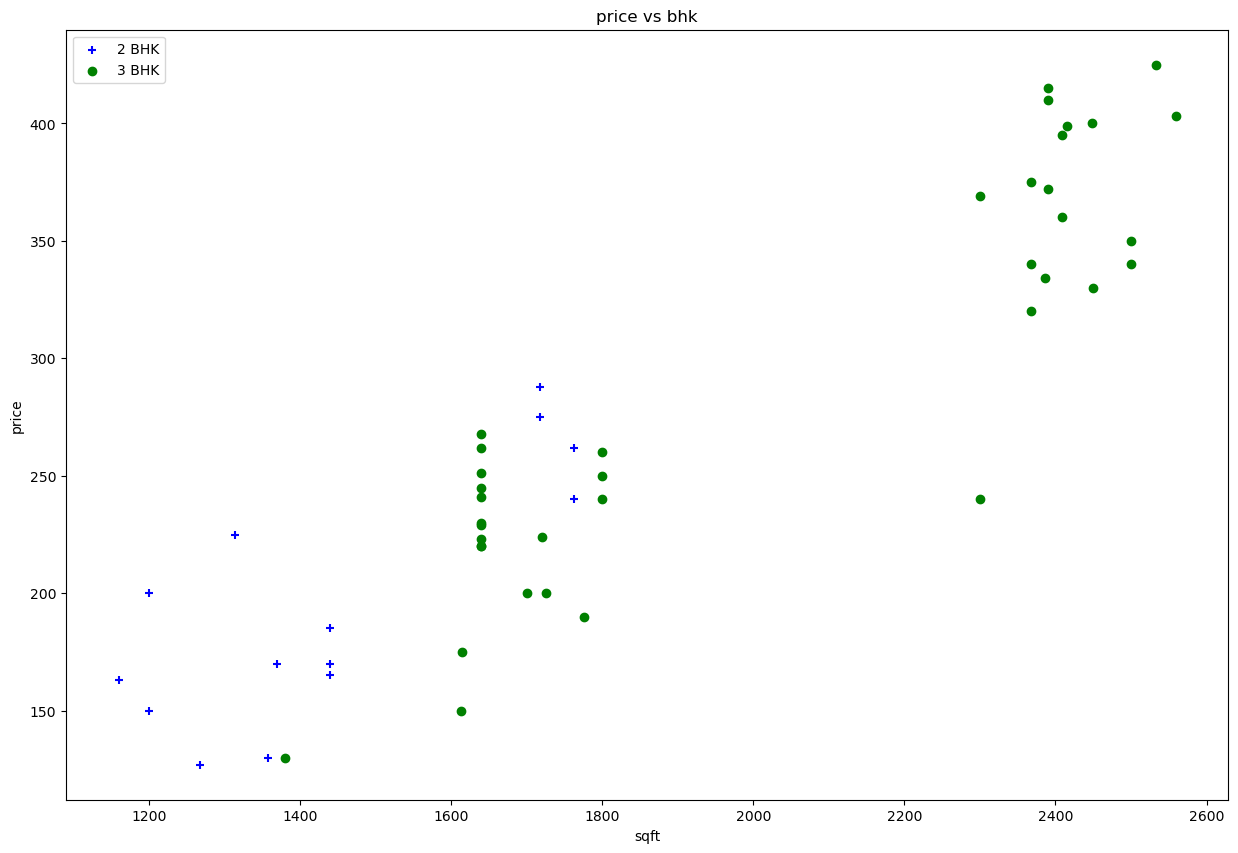

In [51]:
def plot_loc(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker = '+',color = 'blue',label = '2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = 'o',color = 'green',label = '3 BHK')
    plt.xlabel('sqft')
    plt.ylabel('price')
    plt.title('price vs bhk')
    plt.legend()
    
plot_loc(df7,'Rajaji Nagar')

**From the above plot we can see that the price of 2bhk is slightly greater than 3bhk but they have same sqft**

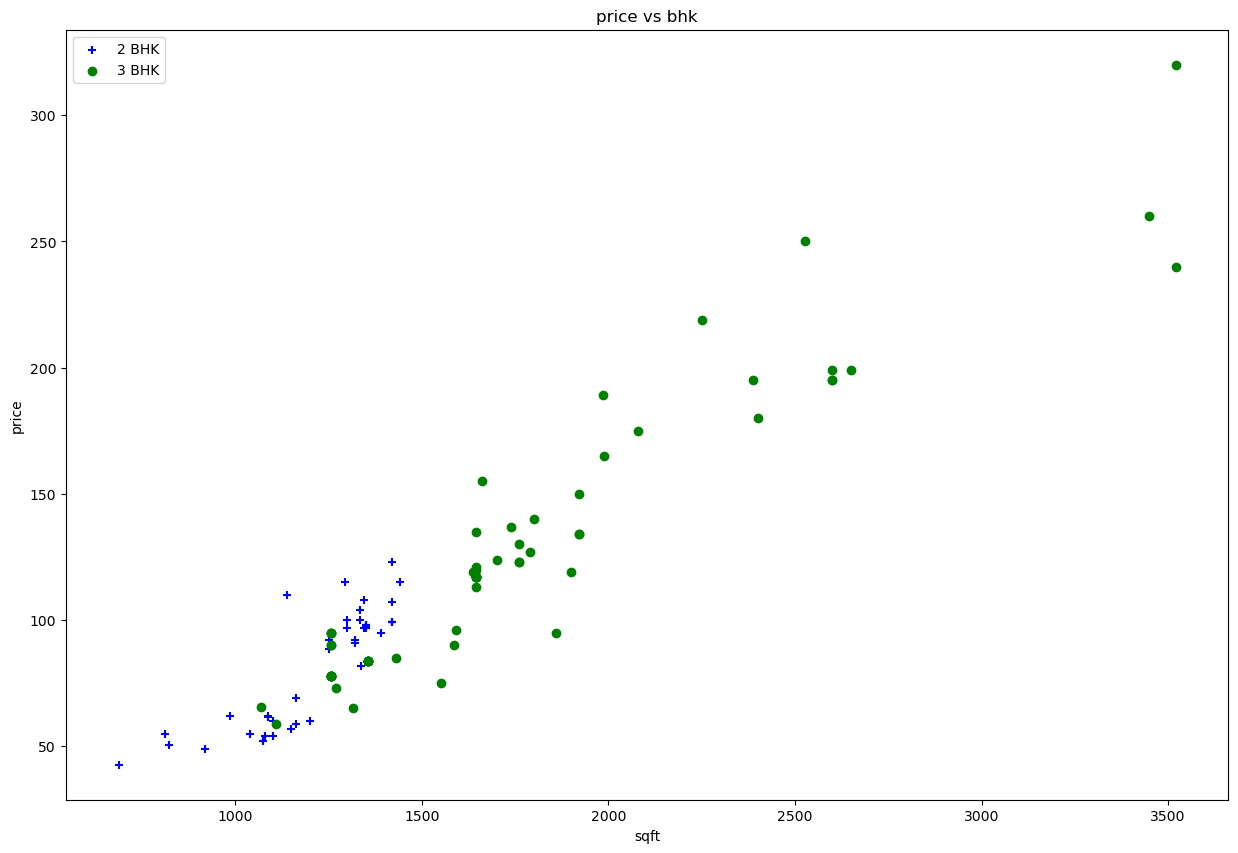

In [53]:
plot_loc(df7,'Hebbal')

**The same case is found in different areas**

**We need to remove the points in the case by the price of 3bhk is smaller than 2bhk. So we create a dictionary having mean, std, count values of multiple bhk's. If the mean of max bhk is smaller than min bhk that data point will get excluded**

In [56]:
def remove_outlier_bhk(df):
    exclude_index = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_index = np.append(exclude_index,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_index,axis = 'index')

In [57]:
df8 = remove_outlier_bhk(df7)
df8.shape

(7317, 7)

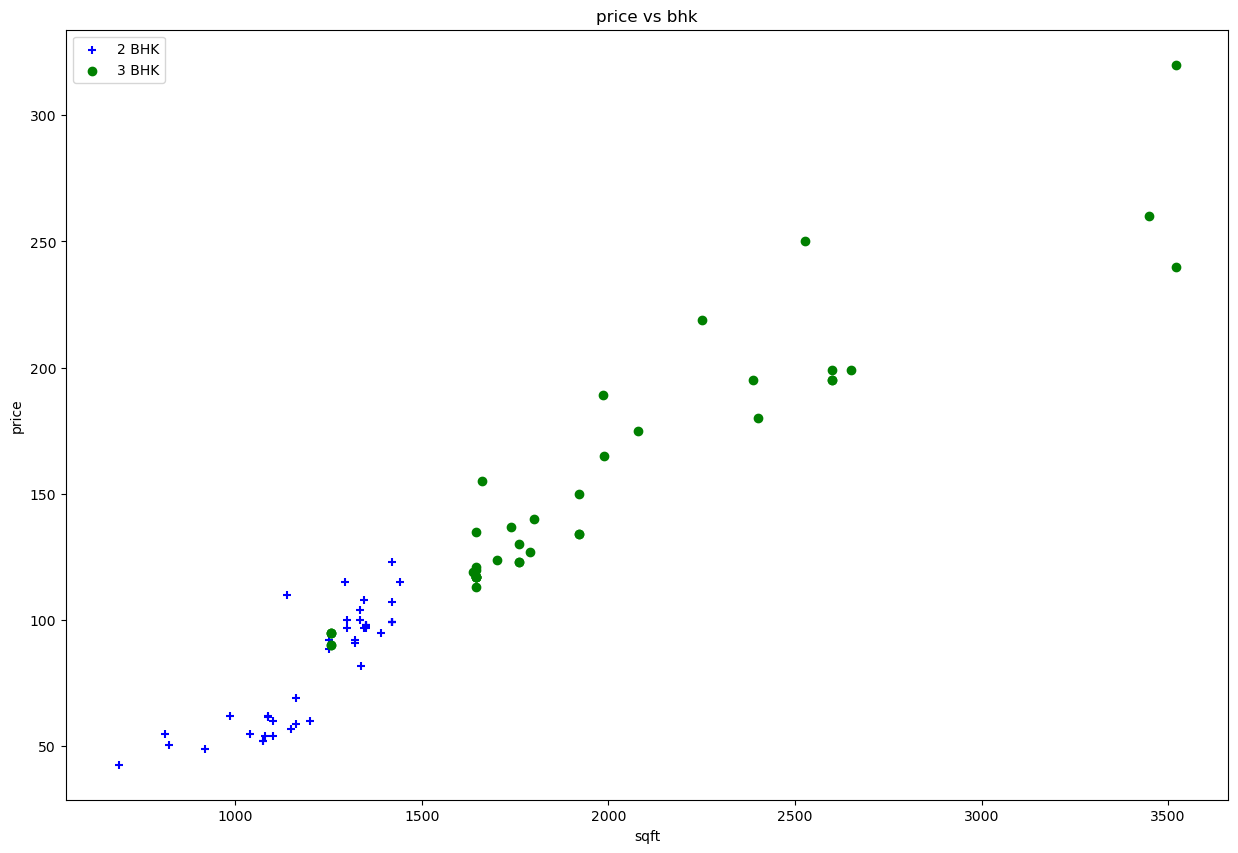

In [58]:
plot_loc(df8,'Hebbal')

**After the removal of outlier based on prices of bhk the plot looks good and some minute points will not affect that much**

Text(0, 0.5, 'Count')

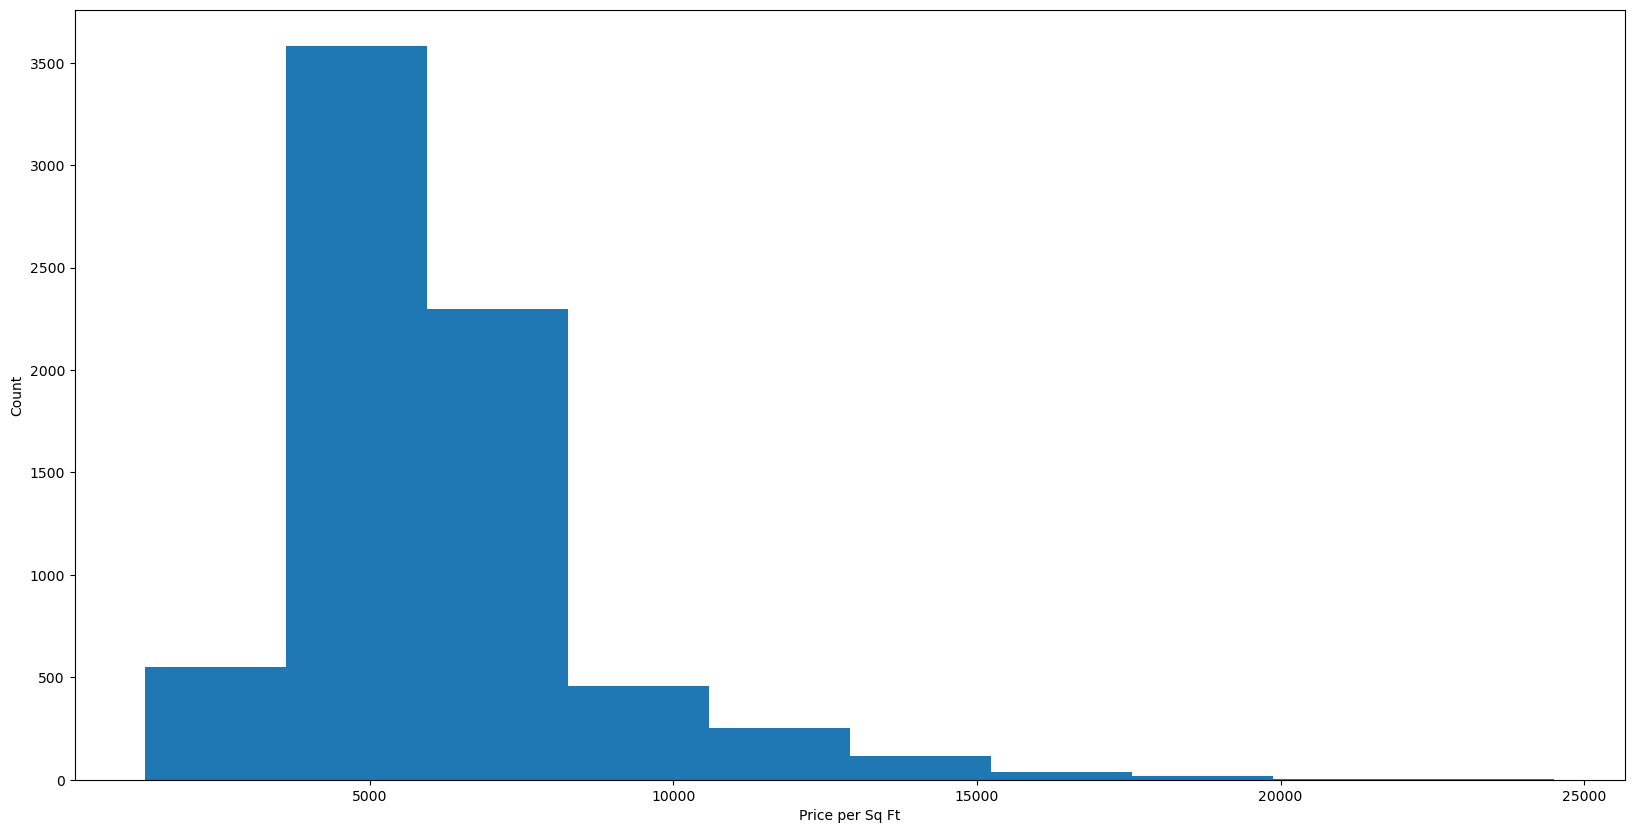

In [60]:
plt.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft)
plt.xlabel('Price per Sq Ft')
plt.ylabel('Count')

In [61]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Frequency')

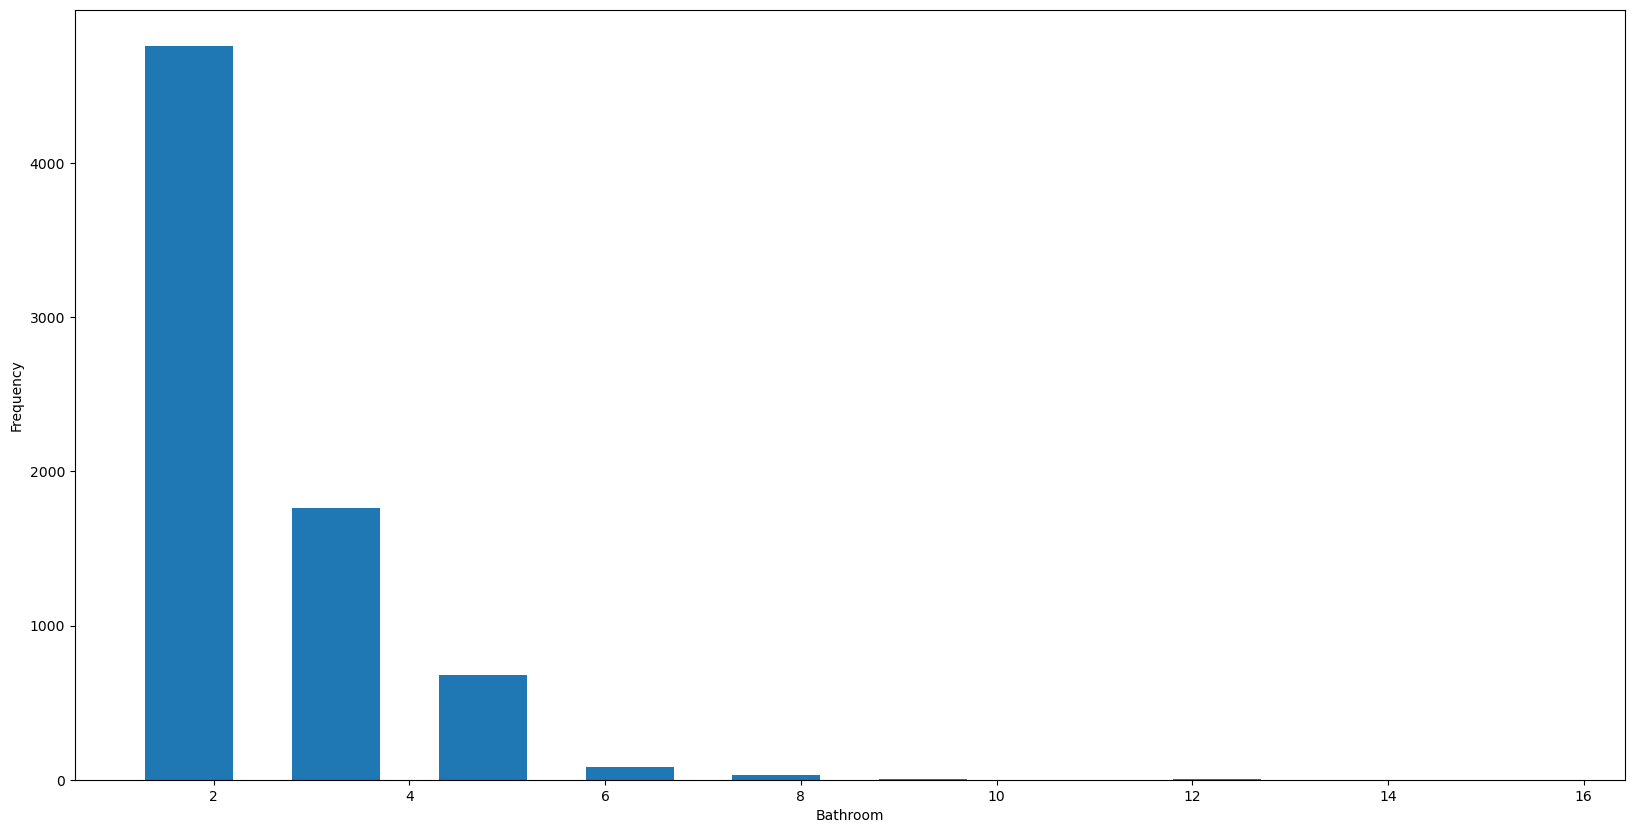

In [63]:
plt.hist(df8.bath,rwidth = 0.6)
plt.xlabel('Bathroom')
plt.ylabel('Frequency')

**We gonna remove the records having bathrooms greater than the bhk value... eg: if bhk = 2 having bathroom = 5**

In [65]:
df8[df8.bath> df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [66]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7239, 7)

**Drop the unnecessary columns for further process.. we gonna drop *size and price_per_sqft* columns**

In [68]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.shape

(7239, 5)

## MODEL BUILDING

In [70]:
dummy = pd.get_dummies(df10.location).astype(int)
dummy.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df11 = pd.concat([df10,dummy.drop('others',axis = 'columns')],axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df11.shape

(7239, 245)

In [73]:
df12 = df11.drop('location',axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
x = df12.drop('price',axis='columns')
y = df12.price

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 99)

In [76]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8707929440809141

In [77]:
cv = ShuffleSplit(n_splits=5,test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

***ShuffleSplit* is used to split randomize the sample so that each of the fold have equal distributions**

### HYPER PARAMETER TUNING

In [80]:
def algo_best_gsc(x,y):
    algos = {
        'linear_reg':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection' : ['cyclic', 'random']
            }
        },
        'dtr':{
            'model': DecisionTreeRegressor(), 
            'params': {
            'max_depth': [2, 3, 4]
            }
        },
        # 'dtc': {
        #     'model':DecisionTreeClassifier(),
        #     'params':{                             This is a regression problem so using a classifier model will leads to error
        #         'criterion':['gini','entropy'],
        #         'splitter':['best','random']
        #     }
        # }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 99)
    for n, k in algos.items():
        #print(k)
        #print(n)
        gsc = GridSearchCV(k['model'],k['params'],return_train_score = False,cv = cv)
        gsc.fit(x,y)
        scores.append({
            'model': n,
            'best_score': gsc.best_score_,
            'best_params':gsc.best_params_
        })
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])
algo_best_gsc(x,y)

,model,best_score,best_params
0,linear_reg,0.842616,{}
1,lasso,0.717622,"{'alpha': 1, 'selection': 'cyclic'}"
2,dtr,0.681414,{'max_depth': 4}


## TESTING THE PREDICTION

In [86]:
np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [87]:
x.iloc[:,:3]

,total_sqft,bath,bhk
0,2850.0,4.0,4
1,1630.0,3.0,3
2,1875.0,2.0,3
3,1200.0,2.0,3
4,1235.0,2.0,2
...,...,...,...
10233,1200.0,2.0,2
10234,1800.0,1.0,1
10237,1353.0,2.0,2
10238,812.0,1.0,1


In [166]:
model_col = x.columns
model_col

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [190]:
def price_prediction(location,sqft,bath,bhk):
    #loc_index = np.where(x.columns == location)[0][0]
    col = model_col
    x = np.zeros(len(col))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location in col:
        loc_index = col.get_loc(location)
        x[loc_index] = 1
    return model.predict([x])[0]

In [192]:
price_prediction('1st Phase JP Nagar',1000, 2, 2)

82.91887734346142

In [194]:
price_prediction('1st Phase JP Nagar',1000, 3, 3)

85.28207435247727

## EXPORT PICKLE

In [201]:
with open('HousePricePrediction.pkl','wb') as f:
    pickle.dump(model,f)

### EXPORT COLUMN INFORMATION FOR FUTURE PURPOSE

In [210]:
columns = {
    'data_col' : [col.lower() for col in x.columns]
}
with open('columns_info.json','w') as f:
    json.dump(columns,f)